<a href="https://colab.research.google.com/github/Ahshaam/ML-Project/blob/main/ProjectNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data


This dataset has all stars that were identified by the Hipparcos satellite.

In [ ]:
import pandas as pd
import numpy as np
import statistics

df = pd.read_csv("/content/hipparcos-voidmain.csv")
# Extract the strings from dataframe
strings = df['SpType'].values
print(strings)

['F5' 'K3V' 'B9' ... 'A2' 'K4.5III' nan]


#Histograms


Checking star spectral type values

In [ ]:
# New values to use for histogram
list_of_strings = []

for i in range(len(strings)):
  try:
    list_of_strings.append(strings[i][0])
  except:
    list_of_strings.append(np.nan)

df['SpType_New'] = list_of_strings
print(df['SpType_New'])

0          F
1          K
2          B
3          F
4          G
        ... 
64867      A
64868      G
64869      A
64870      K
64871    NaN
Name: SpType_New, Length: 64872, dtype: object


There were too many types of star spectral types, so I more generalized the groups and took the numbers off.

In [ ]:
print(list_of_strings)

['F', 'K', 'B', 'F', 'G', 'M', 'G', 'M', 'G', 'F', 'A', 'K', 'K', 'K', 'K', 'F', nan, 'K', 'G', 'G', 'K', 'G', 'F', 'G', 'G', 'F', 'G', 'F', 'G', 'A', 'K', 'B', 'F', 'F', 'G', 'K', 'F', 'G', 'F', 'A', 'B', 'F', 'G', 'K', 'G', 'K', 'K', 'K', 'F', 'G', 'K', 'A', nan, 'M', 'G', 'K', 'K', 'G', 'B', 'F', 'K', 'G', 'B', 'K', nan, 'F', 'F', 'K', 'A', nan, 'G', 'G', 'K', 'K', 'K', 'M', 'A', 'K', 'F', 'G', 'G', 'G', 'M', 'K', 'A', 'B', 'F', 'G', 'K', 'F', 'K', 'G', 'F', 'G', 'F', 'M', 'F', 'F', 'C', 'G', 'F', 'M', 'F', 'F', 'F', 'G', 'M', 'K', 'F', 'G', 'M', 'M', 'A', 'G', 'A', 'F', 'G', 'G', 'K', 'K', 'K', 'K', 'K', 'F', 'F', 'G', nan, 'A', 'F', 'K', 'A', 'F', 'F', 'A', 'G', 'K', 'B', 'K', 'B', 'F', 'K', 'K', 'K', 'K', 'B', 'A', 'K', 'K', 'F', 'K', 'F', 'F', 'F', 'M', 'A', 'B', 'G', 'K', 'A', 'B', 'K', 'G', 'A', 'G', 'A', 'G', 'B', 'R', 'M', 'F', 'G', 'O', 'A', 'G', 'G', 'K', 'A', 'F', 'G', 'K', 'M', 'K', 'B', 'K', 'F', 'A', 'G', 'F', 'A', 'G', 'M', 'G', 'G', 'F', 'F', 'K', 'K', 'A', 'A', 'F',

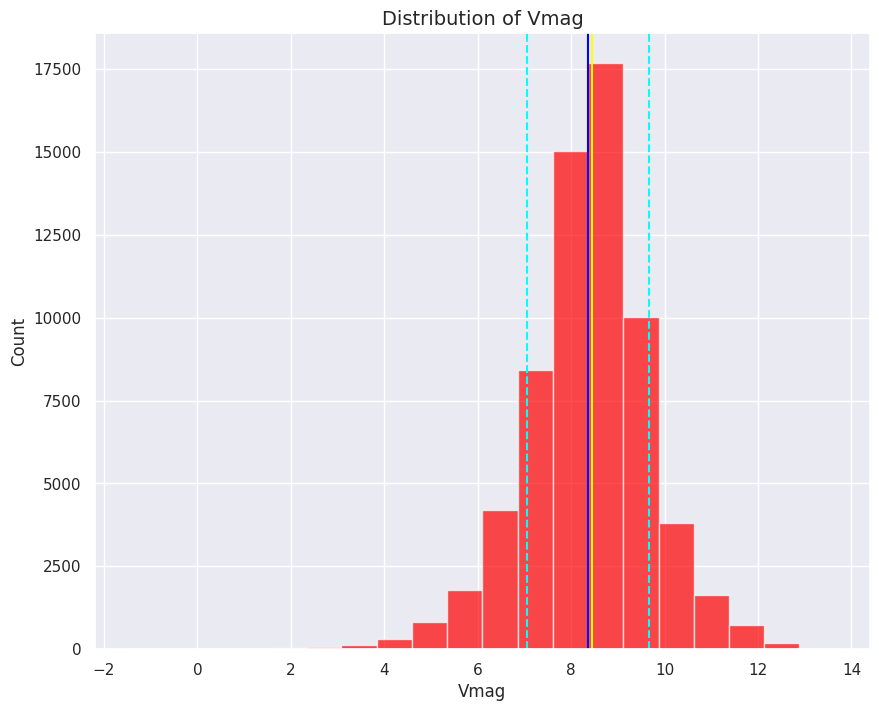

In [ ]:
# import matplotlib (for graphing)
import matplotlib.pyplot as plt

# Add background
import seaborn as sns
sns.set()

#change size
plt.figure(figsize=(10, 8))

# show histogram of column
plt.hist(df['Vmag'], color='red', alpha=.7, bins = 20)
plt.axvline(df['Vmag'].mean(), color='blue')
plt.axvline(df['Vmag'].median(), color='yellow')
plt.axvline(df['Vmag'].mean()+df['Vmag'].std(), color='cyan', linestyle='dashed')
plt.axvline(df['Vmag'].mean()-df['Vmag'].std(), color='cyan', linestyle='dashed')

plt.ylabel('Count')
plt.xlabel('Vmag')

plt.title('Distribution of Vmag', size=14)
plt.savefig('Distribution of Vmag',dpi=200)

plt.show()

Majority of Vmag is between 7 and 9. Dashed lines represent standard deviation. Lines in the middle represent mean and median.

Magnitude: The measure of the brightness of an astronomical object.

Vmag: Visual Magnitude describes light that our eyes are most sensitive to. More similar to green light.

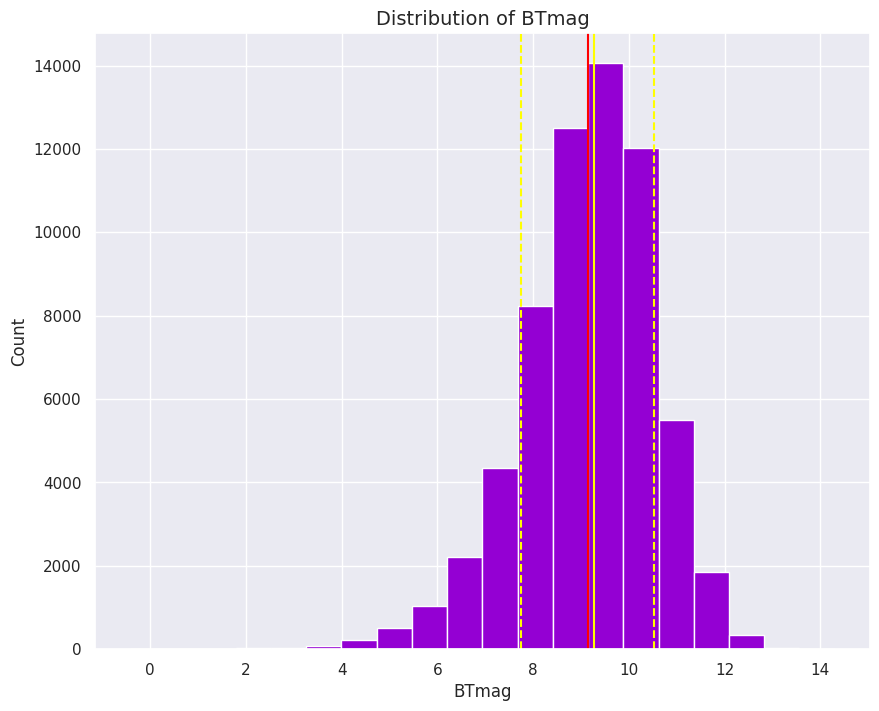

In [ ]:
sns.set()

plt.figure(figsize=(10, 8))

plt.hist(df['BTmag'], color='darkviolet', alpha=1, bins = 20)
plt.axvline(df['BTmag'].mean(), color='red')
plt.axvline(df['BTmag'].median(), color='yellow')
plt.axvline(df['BTmag'].mean()+df['BTmag'].std(), color='yellow', linestyle='dashed')
plt.axvline(df['BTmag'].mean()-df['BTmag'].std(), color='yellow', linestyle='dashed')

plt.ylabel('Count')
plt.xlabel('BTmag')

plt.title('Distribution of BTmag', size=14)
plt.savefig('Distribution of BTmag',dpi=200)

plt.show()

I see that a majority of BTmag is between 8 and 11.

BTmag describes blue light, which is light that our eyes are least sensitive to. T stands for Tycho which is what took the data.

Smaller number means bright, and large means faint.

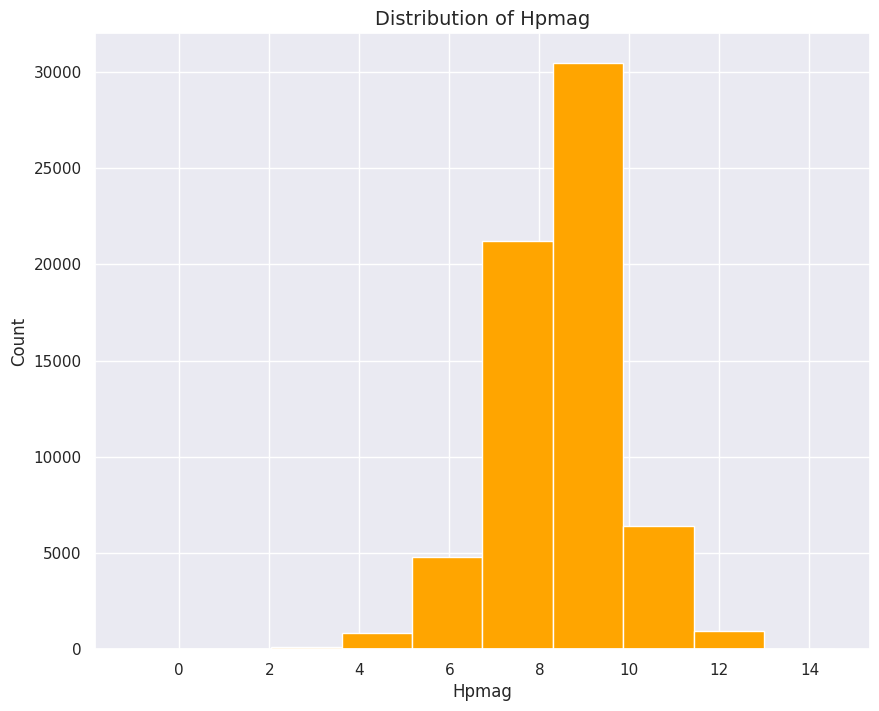

In [ ]:
sns.set()

plt.figure(figsize=(10, 8))

plt.hist(df['Hpmag'], color='orange', alpha=1)

plt.ylabel('Count')
plt.xlabel('Hpmag')

plt.title('Distribution of Hpmag', size=14)
plt.savefig('Distribution of Hpmag',dpi=200)

plt.show()

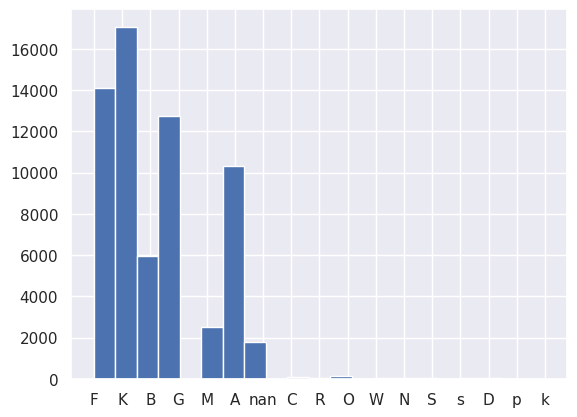

['A' 'B' 'C' 'D' 'F' 'G' 'K' 'M' 'N' 'O' 'R' 'S' 'W' 'k' 'nan' 'p' 's']


In [ ]:
plt.figure()
plt.hist(df['SpType_New'].astype(str).values, bins = 21)
plt.show()
print(np.unique(df['SpType_New'].astype(str).values))

Had to caste the spectral types in order to put them on a histogram. It looks like one of the parentheses passed as a spectral type after I casted it. There are also alot of nan values.

#Clean null values

In [ ]:
# Query a dataframe
var = ''
df.query('SpType_New == @var')['SpType'].index

Int64Index([], dtype='int64')

In [ ]:
df = df.drop(['Proxy', 'RAhms', 'DEdms', 'AstroRef', 'Plx', 'Survey', 'Chart', 'Notes', 'e_dHp', 'e_rho', 'rho', 'theta', 'm_HIP', 'Source', 'Nsys', 'Ncomp', 'CCDM', 'n_CCDM', 'morePhoto', 'moreVar', 'Period', 'r_V-I', 'r_B-V', '---', ], axis=1)

I began to drop unneeded columns. These are only some of the columns that I need to drop, and I will figure out more to drop later.

In [ ]:
df = df[df['SpType_New'].str.contains('C|R|W|N|S|s|D|p|k|\(')==False]

In [ ]:
bad_type = 'O'
df.query('SpType_New != @bad_type', inplace=True)

There were too many identifications that would make the plots messy, so I got rid of the insignificant ones that had less than 100 counts, or ones that were not major ones. There were very little of the O spectral type so I got rid of it as it looked like an outlier on the graphs.


In [ ]:
df

,Catalog,HIP,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,pmRA,pmDE,e_RAdeg,...,Qual,dHp,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType,SpType_New
0,H,1,9.10,NaN,H,0.000912,1.089013,-5.20,-1.88,1.32,...,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S,F
1,H,2,9.27,NaN,G,0.003797,-19.498837,181.21,-0.93,1.28,...,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4,K
2,H,3,6.61,NaN,G,0.005008,38.859286,5.24,-2.91,0.53,...,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S,B
3,H,4,8.06,NaN,H,0.008382,-51.893546,62.85,0.16,0.53,...,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2,F
4,H,5,8.55,NaN,H,0.009965,-40.591224,2.53,9.07,0.64,...,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64866,H,64923,9.33,NaN,H,199.602554,48.905584,-109.26,-11.52,0.92,...,NaN,NaN,NaN,B+49 2208,NaN,NaN,0.73,G5,S,G
64867,H,64925,6.87,NaN,H,199.603857,-45.764611,-32.06,-17.97,0.57,...,NaN,NaN,115527.0,NaN,C-45 8372,P-45 6339,0.01,A0V,2,A
64868,H,64924,4.74,NaN,G,199.604050,-18.308611,-1069.90,-1063.78,0.63,...,NaN,NaN,115617.0,B-17 3813,NaN,NaN,0.75,G5V,4,G
64869,H,64926,9.23,NaN,H,199.608409,48.360766,4.89,-4.54,0.86,...,NaN,NaN,115750.0,B+49 2207,NaN,NaN,0.22,A2,S,A


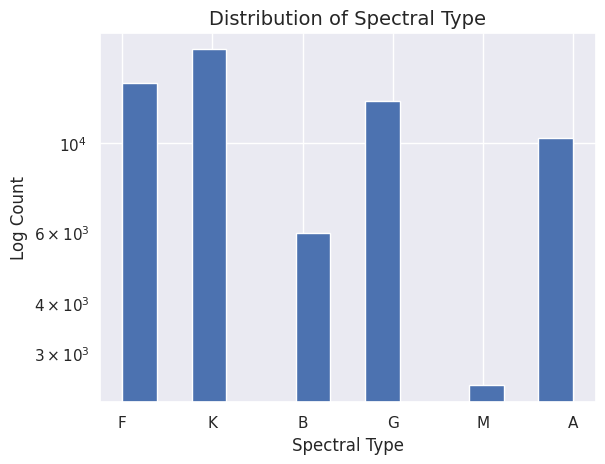

In [ ]:
plt.figure()
plt.hist(df['SpType_New'].astype(str).values, bins = 13, log=True)
plt.ylabel('Log Count')
plt.xlabel('Spectral Type')

plt.title('Distribution of Spectral Type', size=14)
plt.savefig('Distribution of Spectral Type',dpi=200)
plt.show()

Had to make the Spectral Type counts(y axis) log because some values were too small and not showing originally on the histogram.


In [ ]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HIP,Vmag,VarFlag,RAdeg,DEdeg,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,...,e_V-I,Hpmag,e_Hpmag,Hpscat,o_Hpmag,Hpmax,HPmin,dHp,HD,(V-I)red
HIP,1.000000,0.000548,0.005187,0.999018,-0.074570,-0.245935,0.011358,-0.001982,-0.002032,-0.010557,...,0.000982,-0.000222,0.006687,0.007401,0.078978,-0.001164,-0.000189,0.017037,0.541881,0.003283
Vmag,0.000548,1.000000,0.431056,-0.000461,0.024571,0.014518,-0.044267,0.177957,0.171637,0.337855,...,0.246658,0.998232,0.138905,0.177887,-0.032123,0.995319,0.996712,-0.113898,0.188545,0.082962
VarFlag,0.005187,0.431056,1.000000,0.005890,0.023697,0.013556,-0.009365,0.220665,0.213546,0.226755,...,0.331891,0.414535,0.432482,0.500363,-0.115891,0.356767,0.475146,-0.281749,0.127440,0.282681
RAdeg,0.999018,-0.000461,0.005890,1.000000,-0.074090,-0.244636,0.011820,-0.003962,-0.003940,-0.011814,...,0.000194,-0.001200,0.005267,0.006634,0.076675,-0.002058,-0.001175,0.017070,0.542465,0.002155
DEdeg,-0.074570,0.024571,0.023697,-0.074090,1.000000,0.004950,-0.126788,0.048852,0.010037,0.097004,...,0.052230,0.025164,0.005420,-0.003034,-0.117416,0.025990,0.025352,-0.024341,0.040556,0.012080
pmRA,-0.245935,0.014518,0.013556,-0.244636,0.004950,1.000000,-0.201006,0.010540,0.010226,0.010479,...,0.002283,0.015302,0.004993,0.003816,-0.014756,0.014717,0.015201,0.005272,-0.132368,0.021328
pmDE,0.011358,-0.044267,-0.009365,0.011820,-0.126788,-0.201006,1.000000,-0.044867,-0.028791,-0.084096,...,-0.013347,-0.045523,-0.006476,-0.001344,0.058332,-0.045393,-0.045202,0.027600,-0.013919,-0.071631
e_RAdeg,-0.001982,0.177957,0.220665,-0.003962,0.048852,0.010540,-0.044867,1.000000,0.950282,0.698197,...,0.102686,0.173511,0.473575,0.129302,-0.157451,0.219738,0.232626,-0.201215,0.074328,0.019077
e_DEdeg,-0.002032,0.171637,0.213546,-0.003940,0.010037,0.010226,-0.028791,0.950282,1.000000,0.620349,...,0.082586,0.168439,0.453905,0.109711,-0.055741,0.207824,0.218804,-0.191160,0.052256,0.015151
e_Plx,-0.010557,0.337855,0.226755,-0.011814,0.097004,0.010479,-0.084096,0.698197,0.620349,1.000000,...,0.182794,0.334414,0.339096,0.174624,-0.122585,0.370711,0.386069,-0.267957,0.116719,0.057594


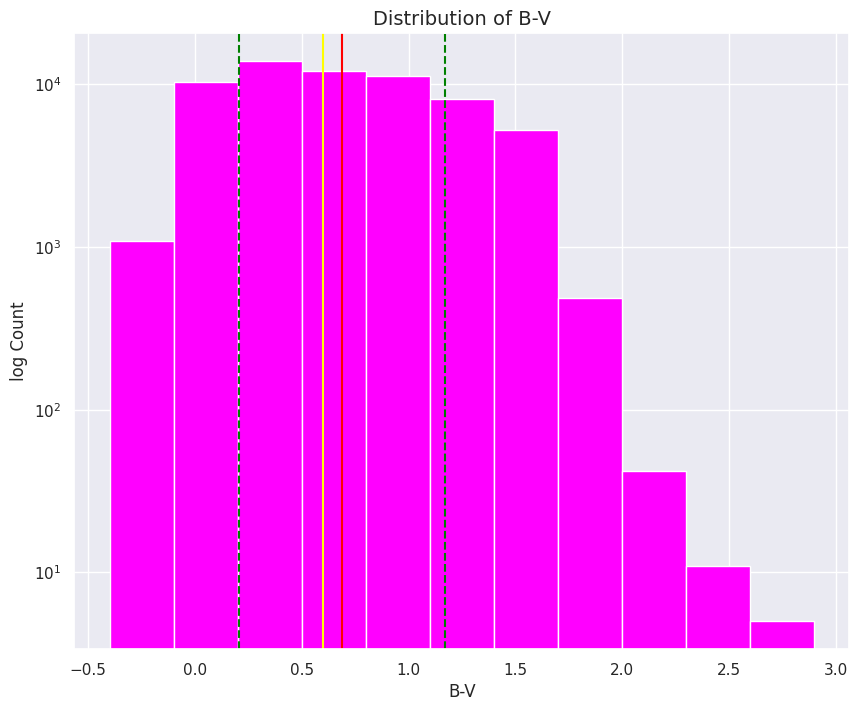

In [ ]:
sns.set()

plt.figure(figsize=(10, 8))

plt.hist(df['B-V'], color='magenta', alpha=1, log=True, bins = 11)

plt.ylabel('log Count')
plt.xlabel('B-V')

plt.axvline(df['B-V'].mean(), color='red')
plt.axvline(df['B-V'].median(), color='yellow')
plt.axvline(df['B-V'].mean()+df['B-V'].std(), color='green', linestyle='dashed')
plt.axvline(df['B-V'].mean()-df['B-V'].std(), color='green', linestyle='dashed')

plt.title('Distribution of B-V', size=14)
plt.savefig('Distribution of B-V',dpi=200)

plt.show()

It looked very skewed so I had to log it in order to see the smaller values.

Color: The difference of two magnitudes.

This is the difference of the BTmag and the Vmag.

Smaller means bright/hotter, and large means faint/cooler. Smaller BTmag = more blue light(hotter/brighter)




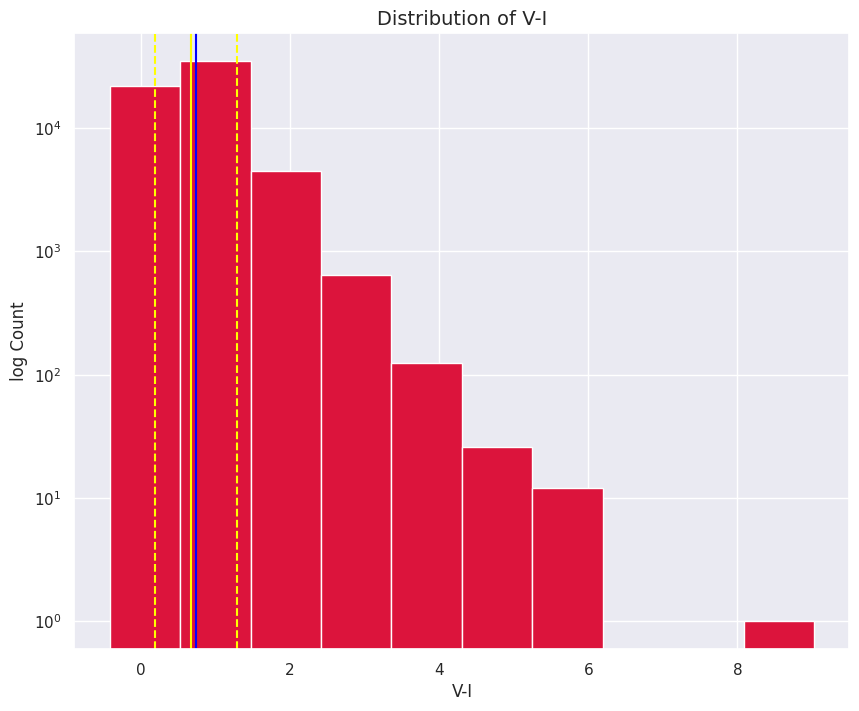

In [ ]:
sns.set()

plt.figure(figsize=(10, 8))

plt.hist(df['V-I'], color='crimson', alpha=1, log = True, bins = 10)

plt.ylabel('log Count')
plt.xlabel('V-I')

plt.axvline(df['V-I'].mean(), color='blue')
plt.axvline(df['V-I'].median(), color='yellow')
plt.axvline(df['V-I'].mean()+df['V-I'].std(), color='yellow', linestyle='dashed')
plt.axvline(df['V-I'].mean()-df['V-I'].std(), color='yellow', linestyle='dashed')



plt.title('Distribution of V-I', size=14)
plt.savefig('Distribution of V-I',dpi=200)

plt.show()

B stands for Blue light, and V stands for visual light. Brighter in Blue means it's hotter, and brighter in red means it's cooler. Visual is in-between.

‘I’ stands for infrared. Has to do more with red light. Around the opposite side of the spectrum when it comes to B-V

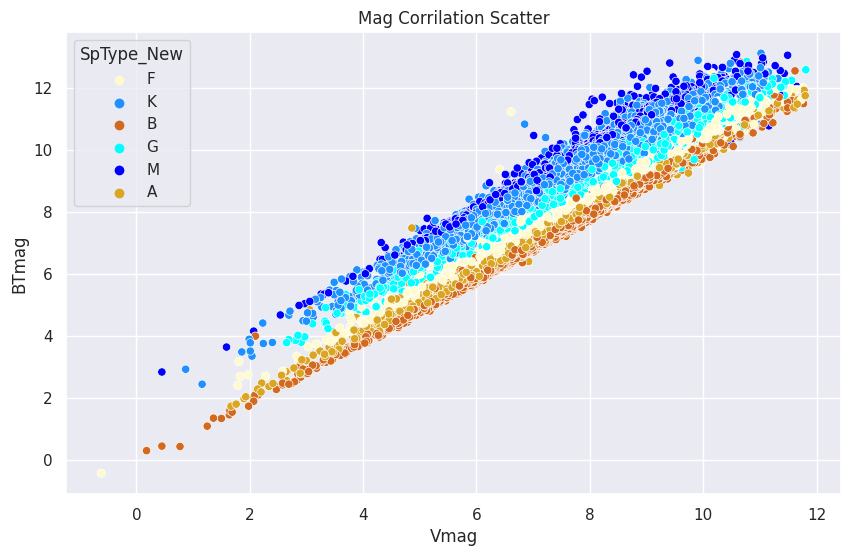

In [ ]:
sns.set()

plt.figure(figsize=(10,6))

#sns.regplot(df['Vmag'], df['BTmag'])
color_dict=dict({'O':'red',
                 'B':'chocolate',
                 'A':'goldenrod',
                 'F':'lemonchiffon',
                 'G':'cyan',
                 'K':'dodgerblue',
                 'M':'blue'})
sns.scatterplot(x=df['Vmag'], y=df['BTmag'],
                 hue=df['SpType_New'],
                sizes=(20, 600),
                palette=color_dict)


title = 'Mag Corrilation Scatter'
plt.title(title)
plt.savefig(title, dpi=200)
plt.show()

Order from hottest to coolest/brightest to most dim: B, A, F, G, K, M

Around B-V<0.5 = Hotter

Around B-V>1.5 = Cooler

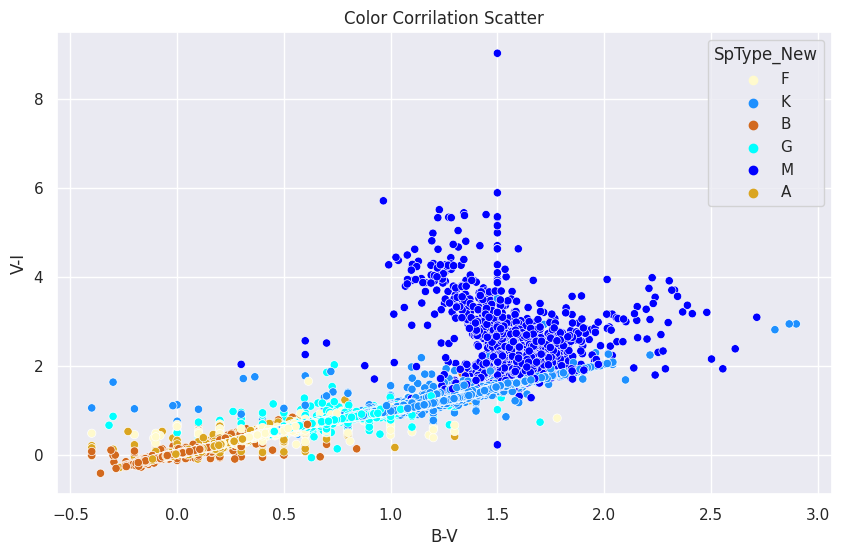

In [ ]:
from pylab import*
sns.set()

plt.figure(figsize=(10,6))

color_dict=dict({'O':'red',
                 'B':'chocolate',
                 'A':'goldenrod',
                 'F':'lemonchiffon',
                 'G':'cyan',
                 'K':'dodgerblue',
                 'M':'blue'})

sns.scatterplot(x=df['B-V'], y=df['V-I'],
                 hue=df['SpType_New'],
                sizes=(20, 600),
                palette=color_dict,legend='brief')

title = 'Color Corrilation Scatter'
plt.title(title)

plt.savefig(title, dpi=200)
plt.show()

There is a clear corrilation between the data. Data is not as clear due to more generalized spectral types.

#Machine Learning

In [ ]:
y = df['SpType_New']
x = df.loc[:,'Catalog':'(V-I)red']

In [ ]:
df.head(20)

,Catalog,HIP,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,pmRA,pmDE,e_RAdeg,...,Qual,dHp,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType,SpType_New
0,H,1,9.10,NaN,H,0.000912,1.089013,-5.20,-1.88,1.32,...,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S,F
1,H,2,9.27,NaN,G,0.003797,-19.498837,181.21,-0.93,1.28,...,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4,K
2,H,3,6.61,NaN,G,0.005008,38.859286,5.24,-2.91,0.53,...,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S,B
3,H,4,8.06,NaN,H,0.008382,-51.893546,62.85,0.16,0.53,...,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2,F
4,H,5,8.55,NaN,H,0.009965,-40.591224,2.53,9.07,0.64,...,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2,G
5,H,6,12.31,NaN,G,0.018141,3.946489,226.29,-12.84,4.03,...,NaN,NaN,NaN,NaN,NaN,NaN,1.55,M0V:,S,M
6,H,7,9.64,NaN,G,0.022549,20.036602,-208.12,-200.79,1.01,...,NaN,NaN,NaN,B+19 5185,NaN,NaN,0.79,G0,S,G
7,H,8,9.05,3.0,H,0.027292,25.886474,19.09,-5.66,1.70,...,S,NaN,224709.0,B+25 5054,NaN,NaN,4.82,M6e-M8.5e Tc,G,M
8,H,9,8.59,NaN,H,0.035342,36.585938,-6.30,8.42,0.86,...,NaN,NaN,224708.0,B+35 5149,NaN,NaN,1.00,G5,S,G
9,H,10,8.59,NaN,H,0.036253,-50.867074,42.23,40.02,0.77,...,NaN,NaN,224717.0,NaN,C-51 13738,P-51 12065,0.51,F6V,2,F


In [ ]:
x

,Catalog,HIP,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,pmRA,pmDE,e_RAdeg,...,HPmin,HvarType,MultFlag,Qual,dHp,HD,BD,CoD,CPD,(V-I)red
0,H,1,9.10,NaN,H,0.000912,1.089013,-5.20,-1.88,1.32,...,9.24,NaN,NaN,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66
1,H,2,9.27,NaN,G,0.003797,-19.498837,181.21,-0.93,1.28,...,9.44,C,O,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04
2,H,3,6.61,NaN,G,0.005008,38.859286,5.24,-2.91,0.53,...,6.62,C,NaN,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00
3,H,4,8.06,NaN,H,0.008382,-51.893546,62.85,0.16,0.53,...,8.18,NaN,NaN,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43
4,H,5,8.55,NaN,H,0.009965,-40.591224,2.53,9.07,0.64,...,8.74,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64866,H,64923,9.33,NaN,H,199.602554,48.905584,-109.26,-11.52,0.92,...,9.52,NaN,NaN,NaN,NaN,NaN,B+49 2208,NaN,NaN,0.73
64867,H,64925,6.87,NaN,H,199.603857,-45.764611,-32.06,-17.97,0.57,...,6.89,C,NaN,NaN,NaN,115527.0,NaN,C-45 8372,P-45 6339,0.01
64868,H,64924,4.74,NaN,G,199.604050,-18.308611,-1069.90,-1063.78,0.63,...,4.89,C,NaN,NaN,NaN,115617.0,B-17 3813,NaN,NaN,0.75
64869,H,64926,9.23,NaN,H,199.608409,48.360766,4.89,-4.54,0.86,...,9.35,NaN,NaN,NaN,NaN,115750.0,B+49 2207,NaN,NaN,0.22


In [ ]:
x = x.drop([ 'Catalog', 'VarFlag','HvarType', 'm_Hpmag', 'CombMag', 'm_BTmag', 'MultFlag', 'HIP', 'Qual', 'dHp', 'BD', 'CoD', 'CPD', 'HD'],axis=1)

Had to drop many more columns due to dummies crashing

In [ ]:
x.isnull().sum()

Vmag            0
r_Vmag          0
RAdeg          69
DEdeg          69
pmRA           69
pmDE           69
e_RAdeg        69
e_DEdeg        69
e_Plx          69
e_pmRA         69
e_pmDE         69
DE:RA          69
Plx:RA         69
Plx:DE         69
pmRA:RA        69
pmRA:DE        69
pmRA:Plx       69
pmDE:RA        69
pmDE:DE        69
pmDE:Plx       69
pmDE:pmRA      69
F1             69
F2            773
BTmag        1094
e_BTmag      1094
VTmag        1061
e_VTmag      1061
B-V           310
e_B-V         310
V-I           310
e_V-I         310
Hpmag           8
e_Hpmag         8
Hpscat        286
o_Hpmag       286
Hpmax         286
HPmin         286
(V-I)red        0
dtype: int64

In [ ]:
x['RAdeg'].fillna(x['RAdeg'].median(), inplace=True)
x['DEdeg'].fillna(x['DEdeg'].median(), inplace=True)
x['pmRA'].fillna(x['pmRA'].median(), inplace=True)
x['pmDE'].fillna(x['pmDE'].median(), inplace=True)
x['DEdeg'].fillna(x['DEdeg'].median(), inplace=True)
x['pmDE'].fillna(x['DEdeg'].median(), inplace=True)
x['e_RAdeg'].fillna(x['e_RAdeg'].median(), inplace=True)
x['e_DEdeg'].fillna(x['e_DEdeg'].median(), inplace=True)
x['e_Plx'].fillna(x['e_Plx'].median(), inplace=True)
x['e_pmRA'].fillna(x['e_pmRA'].median(), inplace=True)
x['e_pmDE'].fillna(x['e_pmDE'].median(), inplace=True)
x['DE:RA'].fillna(x['DE:RA'].median(), inplace=True)
x['Plx:RA'].fillna(x['Plx:RA'].median(), inplace=True)
x['Plx:DE'].fillna(x['Plx:DE'].median(), inplace=True)
x['pmRA:RA'].fillna(x['pmRA:RA'].median(), inplace=True)
x['pmRA:DE'].fillna(x['pmRA:DE'].median(), inplace=True)
x['pmRA:Plx'].fillna(x['pmRA:Plx'].median(), inplace=True)
x['pmDE:RA'].fillna(x['pmDE:RA'].median(), inplace=True)
x['pmDE:DE'].fillna(x['pmDE:DE'].median(), inplace=True)
x['pmDE:Plx'].fillna(x['pmDE:Plx'].median(), inplace=True)
x['pmDE:pmRA'].fillna(x['pmDE:pmRA'].median(), inplace=True)

x['B-V'].fillna(x['B-V'].median(), inplace=True)
x['e_B-V'].fillna(x['e_B-V'].median(), inplace=True)
x['V-I'].fillna(x['V-I'].median(), inplace=True)
x['e_V-I'].fillna(x['e_V-I'].median(), inplace=True)

x['e_Hpmag'].fillna(x['e_Hpmag'].median(), inplace=True)
x['Hpmag'].fillna(x['Hpmag'].median(), inplace=True)

x['Hpscat'].fillna(x['Hpscat'].median(), inplace=True)
x['o_Hpmag'].fillna(x['o_Hpmag'].median(), inplace=True)
x['Hpmax'].fillna(x['Hpmax'].median(), inplace=True)
x['HPmin'].fillna(x['HPmin'].median(), inplace=True)

x['F1'].fillna(x['F1'].median(), inplace=True)
x['F2'].fillna(x['F2'].median(), inplace=True)
x['BTmag'].fillna(x['BTmag'].median(), inplace=True)
x['e_BTmag'].fillna(x['e_BTmag'].median(), inplace=True)
x['VTmag'].fillna(x['VTmag'].median(), inplace=True)
x['e_VTmag'].fillna(x['e_VTmag'].median(), inplace=True)

Had to clean rest of nulls

In [ ]:
x.isnull().sum()

Vmag         0
r_Vmag       0
RAdeg        0
DEdeg        0
pmRA         0
pmDE         0
e_RAdeg      0
e_DEdeg      0
e_Plx        0
e_pmRA       0
e_pmDE       0
DE:RA        0
Plx:RA       0
Plx:DE       0
pmRA:RA      0
pmRA:DE      0
pmRA:Plx     0
pmDE:RA      0
pmDE:DE      0
pmDE:Plx     0
pmDE:pmRA    0
F1           0
F2           0
BTmag        0
e_BTmag      0
VTmag        0
e_VTmag      0
B-V          0
e_B-V        0
V-I          0
e_V-I        0
Hpmag        0
e_Hpmag      0
Hpscat       0
o_Hpmag      0
Hpmax        0
HPmin        0
(V-I)red     0
dtype: int64

In [ ]:
x = pd.get_dummies(x)

There is a very low score with 60%, hopfully the future models we learn will work better

In [ ]:
y[-5:]

64866    G
64867    A
64868    G
64869    A
64870    K
Name: SpType_New, dtype: object

In [ ]:
def ml_score_classifier(model):
  model.fit(x, y)
  return model.score(x, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ml_score_classifier(DecisionTreeClassifier(max_depth=20))

0.9677290709545686

Don't use regressor! Only use Classifier! Classifier is better fit for the data i'm trying to predict.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=14)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.37882848392036755

KNeighbors is too low to be used

## The Test Set

After splitting data into a training set and a test set, score data on a variety of regressors or classifers.


In [ ]:
def ml_model(model):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
ml_model(DecisionTreeClassifier(max_depth=20))

0.7565084226646248

DecisionTree looks promising, but I will check the rest first.

## Building Random Forests & XGBoost Models

It's time make the best models that you can.

Split your data into training and test sets, then fit Random Forests and XGBoost on your training set, before scoring them on your test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8206993363961205

So far XGBoost and RandomForests work the same.

Starting Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(max_depth=30,
                      n_estimators=300), x, y)
print(scores)
print(scores.mean())

[0.69556548 0.78959962 0.81360664 0.82954455 0.72218234]
0.7700997244678323


Looks like RandomForests would be best to continue as the overall scores are better.

### Classification Metrics

In [ ]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(max_depth=30, n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8233792751403778

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[2152,  206,  232,   31,    5,    0],
       [ 368, 1034,   61,   16,    4,    0],
       [ 178,    0, 3063,  284,   18,    0],
       [   6,    2,  306, 2298,  511,    0],
       [   0,    0,   11,  425, 3811,   47],
       [   0,    0,    1,    2,   54,  546]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.80      0.82      0.81      2626
           B       0.83      0.70      0.76      1483
           F       0.83      0.86      0.85      3543
           G       0.75      0.74      0.74      3123
           K       0.87      0.89      0.88      4294
           M       0.92      0.91      0.91       603

    accuracy                           0.82     15672
   macro avg       0.83      0.82      0.82     15672
weighted avg       0.82      0.82      0.82     15672



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(max_depth=30, n_estimators=300), x, y)
print(scores)
print(scores.mean())

[0.73432764 0.79175307 0.81256979 0.82866715 0.73358858]
0.7801812451064454


In [ ]:
# find optimal hyperparameters by testing combinations using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
def grid_search(params, model):
  # initialize model(s)
  grid_clf = GridSearchCV(model, params)
  # fit to data
  grid_clf.fit(x,y)
  # show results
  print(grid_clf.best_params_)
  print(grid_clf.best_score_)

In [ ]:
# choose dictionary of parameters
params = {'max_depth': [25, 30, 35],
          'n_estimators': [250, 300, 350]}
# initialize model(s)
grid_clf = GridSearchCV(RandomForestClassifier(), params)
# fit to data
grid_clf.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [25, 30, 35],
                         'n_estimators': [250, 300, 350]})

In [ ]:
print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'max_depth': 35, 'n_estimators': 350}
0.780739580947271


It takes too long to run, so I could not get this output before the presentation. It outputted that best max_depth was 30, and best n_estimators was 300.

#Metric

In [ ]:
star_dict = {'B':31000, 'A':9500, 'F':7240, 'G':5920, 'K':5300, 'M':3850}

prediction = model.predict(X_test)
temp_diff = np.zeros((len(prediction)))

for i in range(len(prediction)):
  temp_diff[i] = star_dict[prediction[i]] - star_dict[y_test.iloc[i]]

print(mean(temp_diff))

-359.8136804492088


Had to make custom metric due to no .getDummies on y. Use temp difference between predicted and actual to represent error. I used the average temp for each spectral type.

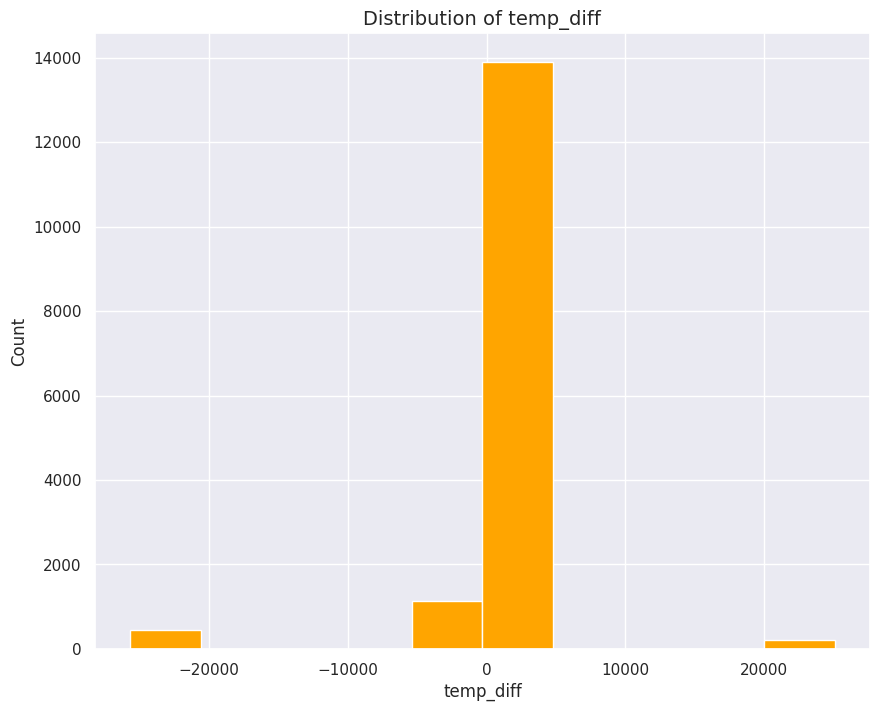

In [ ]:
sns.set()

plt.figure(figsize=(10, 8))

plt.hist(temp_diff, color='orange', alpha=1)

plt.ylabel('Count')
plt.xlabel('temp_diff')

plt.title('Distribution of temp_diff', size=14)
plt.savefig('Distribution of temp_diff',dpi=200)

plt.show()

Distribution of temperature difference between predicted and actual. I use this to represent error. A majority of them are at 0 which is good.


In [ ]:
y_test

26990    A
30215    M
6469     G
44921    M
45580    A
        ..
2179     G
45221    G
54042    G
55434    G
1264     G
Name: SpType_New, Length: 15672, dtype: object

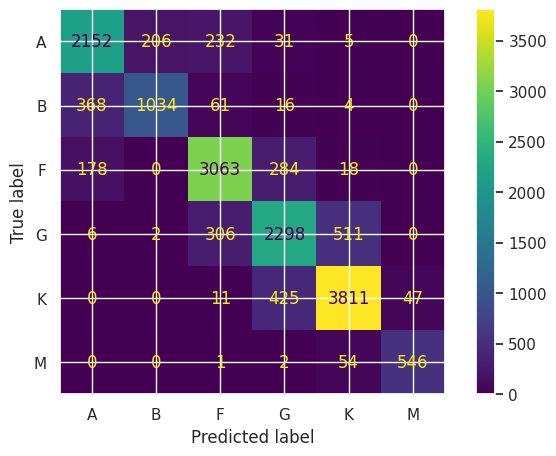

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["A", "B", "F", "G", 'K', 'M'],
)

cmp.plot(ax=ax)
plt.show();

Some predictions off due to more generalized spectral types. We see that is predicted more that 50% of the spectral types correctly.

#Nueral Networks

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x.shape

(62688, 40)

In [ ]:
num_cols = x.shape[1]
model = Sequential()
model.add(Dense(8, input_shape=(num_cols,), activation='relu'))
#model.add(Dense(4, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
y_test_dummies = pd.get_dummies(y_test)
y_train_dummies = pd.get_dummies(y_train)

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train_dummies, epochs=10, )
model.evaluate(X_test, y_test_dummies)

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

cross_entropy_loss = keras.losses.BinaryCrossentropy()

network_optimizer = keras.optimizers.Adam(learning_rate=0.005, beta_1=0.95, beta_2=0.995, epsilon=0.00000000001)

early_stopping_condition = EarlyStopping(monitor='loss', mode='auto', patience=15, restore_best_weights=True, min_delta=0)

plateau_monitor = ReduceLROnPlateau(monitor='loss', mode='auto', patience=5, factor=0.03, min_lr=0.0000001)

model.compile(loss=cross_entropy_loss, optimizer=network_optimizer)

model.fit(X_train, y_train_dummies, callbacks=[early_stopping_condition, plateau_monitor])